# P1: Test a Perceptual Phenomenon

### Sean Angiolillo

## Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>, <font color='blue'>BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='green'>PURPLE</font>, <font color='purple'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions for Investigation

In [95]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

# Enable inline plotting
%matplotlib inline

# read in data as a pandas dataframe
stroop_df = pd.read_csv('stroopdata.csv')

### 1. What is our independent variable? What is our dependent variable?

#### Independent variable: 
-    congruent condition (where color of the ink matches the word printed) or incongruent condition (where color of the ink does not match the word printed)

##### Dependent variable: 
-    time it takes to complete task in seconds 

### 2a. What is an appropriate set of hypotheses for this task?

#### Null hypothesis: 
-    The average time difference to complete the congruent and incongruent conditions will not be statistically significant. In other words:
-        h_null : mu_congruent = mu_incongruent   (OR mu_congruent - mu_incongruent = 0 ; mu_difference = 0)

#### Alternate hypothesis:
-    The average time to complete the congruent condition will not be equal to the time needed to complete the incongruent condition. In other words:
-        h_alt : mu_congruent != mu_incongruent

##### where:
-    h_null : null hypothesis
-    h_alt : alternate hypothesis
-    mu_congruent : average time in seconds to complete congruent condition
-    mu_incongruent : average time in seconds to complete incongruent condition
-    mu_difference : difference of mu_congruent and mu_incongruent

(Sidenote: personal times: 17.115s congruent and 40.733s incongruent)

### 2b. What kind of statistical test do you expect to perform?

I will perform a two-tailed dependent sample t-test.
- two-tailed because my alternate hypothesis is not directional
- dependent sample because the test is performed on the same subjects (within-subject design)

I do not need to use ANOVA because we have only two samples; we cannot use a z-test because we do not know population parameters; a chi squared test is only for nominal data (we have numeric).

Normality is an assumption of the t-test so I did normal probability plots for both. They don't look to be perfectly normal but given a small sample size I'm assuming that is not a problem.

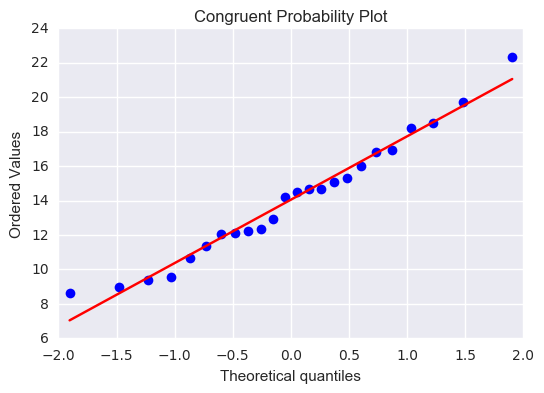

In [100]:
stats.probplot(stroop_df['Congruent'], dist='norm', plot=plt)
plt.title('Congruent Probability Plot')
plt.show()

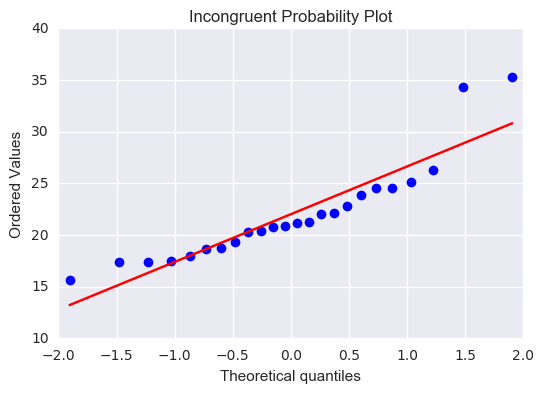

In [101]:
stats.probplot(stroop_df['Incongruent'], dist='norm', plot=plt)
plt.title('Incongruent Probability Plot')
plt.show()

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [103]:
stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


##### We can see sample sizes are the same; mean, standard deviation, min, median, max for Congruent are all less than value for Incongruent.

## 4. Visualizations

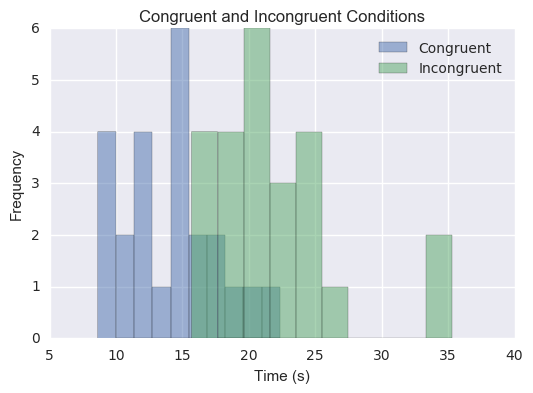

In [104]:
# plotting histograms next to each other is not optimal because of low number of samples and hides paired effect
# but it still shows incongruent data largely to the right of the congruent data
pyplot.hist(stroop_df['Congruent'], bins=10, alpha=0.5, label='Congruent')
pyplot.hist(stroop_df['Incongruent'], bins=10,alpha=0.5, label='Incongruent')
pyplot.legend(loc='upper right')
pyplot.title('Congruent and Incongruent Conditions')
pyplot.xlabel('Time (s)')
pyplot.ylabel('Frequency')
pyplot.show()

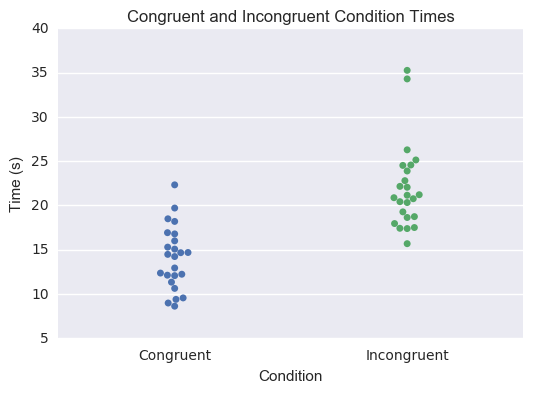

In [105]:
# a bee swarm plot is better but still hides the paired effect
_ = sns.swarmplot(data = stroop_df)

# Label the axes
_ = plt.xlabel('Condition')
_ = plt.ylabel('Time (s)')
_ = plt.title('Congruent and Incongruent Condition Times')
# Show the plot
plt.show()

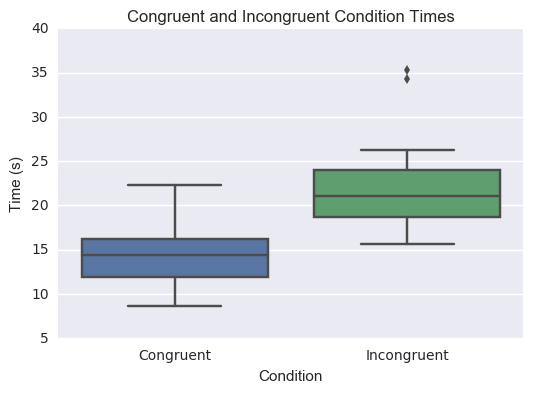

In [106]:
# a box plot is similar to the bee swarm plot but also suffers from failing to reveal the paired effect
_ = sns.boxplot(data = stroop_df)

# Label the axes
_ = plt.xlabel('Condition')
_ = plt.ylabel('Time (s)')
_ = plt.title('Congruent and Incongruent Condition Times')
# Show the plot
plt.show()

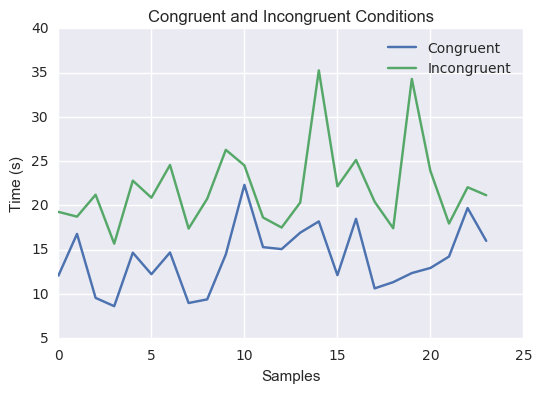

In [107]:
# scatter plot is better in showing the paired effect but gives impression of trend over time which is not true 
pyplot.plot(stroop_df['Congruent'], label='Congruent')
pyplot.plot(stroop_df['Incongruent'], label='Incongruent')
pyplot.legend(loc='upper right')
pyplot.title('Congruent and Incongruent Conditions')
pyplot.xlabel('Samples')
pyplot.ylabel('Time (s)')
pyplot.show()

## 5. Statistical Test: Dependent t-test for paired samples

In [108]:
# first find a point estimate
mu_difference = mean(stroop_df['Congruent']) - mean(stroop_df['Incongruent'])
mu_difference

-7.9647916666666649

In [109]:
# find the t-critical value

# from : http://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic

#Studnt, df=23, p<0.05, 2-tail
#equivalent to Excel TINV(0.05,24)
print(stats.t.ppf(1-0.025, 23))

# NB: I had some confusion whether to use n = 24 or df = 23 but after confirming with table it's the df value needed here

2.06865761042


In [110]:
# find the t-statistic
stats.ttest_rel(stroop_df['Congruent'],stroop_df['Incongruent'], axis=0)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [111]:
# 95% confidence interval

# from : http://stackoverflow.com/questions/31768464/confidence-interval-for-t-test-difference-between-means-in-python

cm = sms.CompareMeans(sms.DescrStatsW(stroop_df['Congruent']), sms.DescrStatsW(stroop_df['Incongruent']))
print(cm.tconfint_diff(usevar='unequal'))

(-10.424698188163974, -5.5048851451693626)


### Dependent t-test for paired samples summary:
- mu_difference : -7.9647916666666649
- t-statistic : -8.020706944109957
- at alpha = 0.05, t-critical : -2.06865761042, 2.06865761042
- P : 4.1030005857111781e-08
- 95% CI : (-10.424698188163974, -5.5048851451693626)

Because the t-statistic falls well into the critical region, we can safely reject the null hypothesis. The difference in times between the congruent and incongruent conditions is statistically significant. With a P value so small, we can see that even for a one-tailed test at alpha = 0.01, the results would still be statistically significant.
With 95% confidence, we can say that users on average complete the incongruent condition 5 to 10 seconds slower than the congruent condition. This results matches my expectations as I saw from my own experience taking the experiment that it is much more difficult to complete the incongruent condition.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

It seems our brains immediately associate a color with a word which fights against other processes in the brain devoted to reading the text. This causes the delay. You could probably observe a similar effect if you wrote the names of basic shapes in the form of another shape. For instance, the word circle in the shape of a square, the word triangle in the shape of a circle. But I have a feeling the color would be the stronger effect. 